In [1]:
#Karan Veer Singh
#Internship Task 3
#Cognifyz Tech 

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Dataset .csv')
print(df.shape)
df.head()

(9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


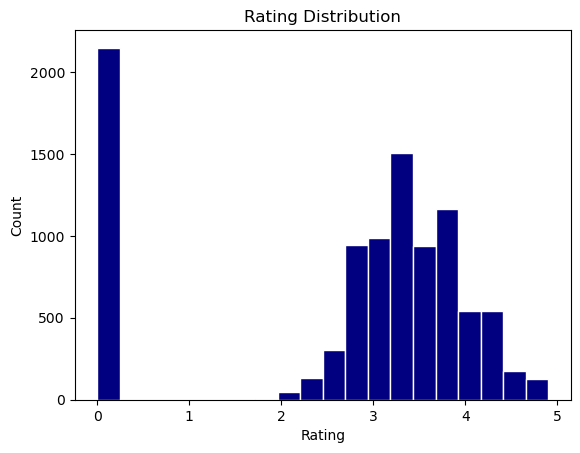

In [2]:
plt.hist(df['Aggregate rating'],bins=20,color='navy',edgecolor='white')
plt.title('Rating Distribution')
plt.xlabel('Rating');plt.ylabel('Count')
plt.show()

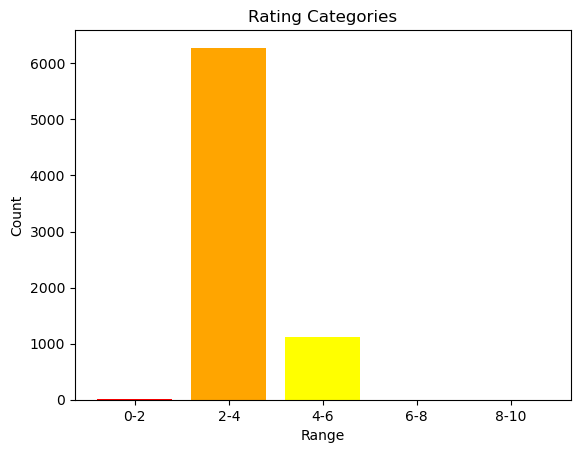

In [3]:
df['Rating_cat']=pd.cut(df['Aggregate rating'],bins=[0,2,4,6,8,10],labels=['0-2','2-4','4-6','6-8','8-10'])
dist=df['Rating_cat'].value_counts().sort_index()
plt.bar(dist.index,dist.values,color=['red','orange','yellow','green','blue'])
plt.title('Rating Categories');plt.xlabel('Range');plt.ylabel('Count')
plt.show()

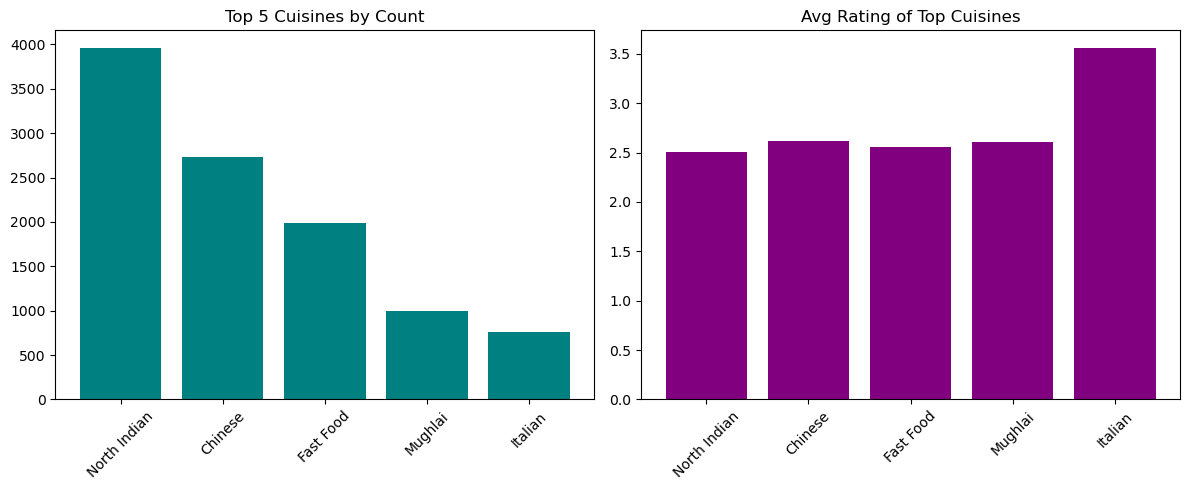

In [11]:
s = df['Cuisines'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True).rename('Cuisine')
tmp = df[['Aggregate rating','Votes']].join(s)
top_cuis = tmp['Cuisine'].value_counts().head(5)
avg_cuis = tmp.groupby('Cuisine')['Aggregate rating'].mean().round(2).loc[top_cuis.index]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(top_cuis.index, top_cuis.values, color='teal')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Top 5 Cuisines by Count')
axes[1].bar(avg_cuis.index, avg_cuis.values, color='purple')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Avg Rating of Top Cuisines')
plt.tight_layout()
plt.show()

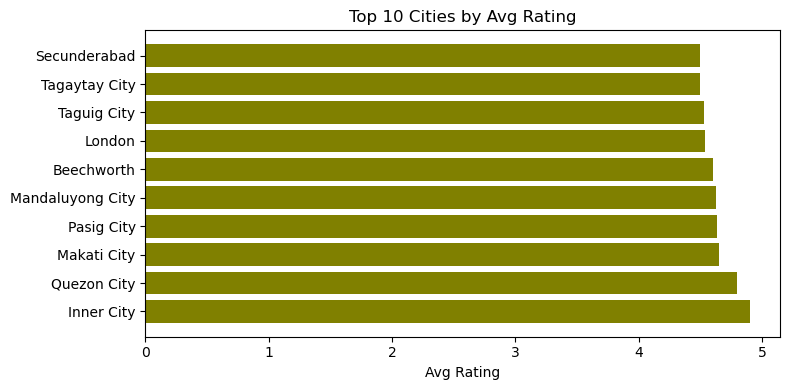

In [5]:
city_stats=df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.barh(city_stats.index,city_stats.values,color='olive')
plt.title('Top 10 Cities by Avg Rating');plt.xlabel('Avg Rating')
plt.tight_layout();plt.show()

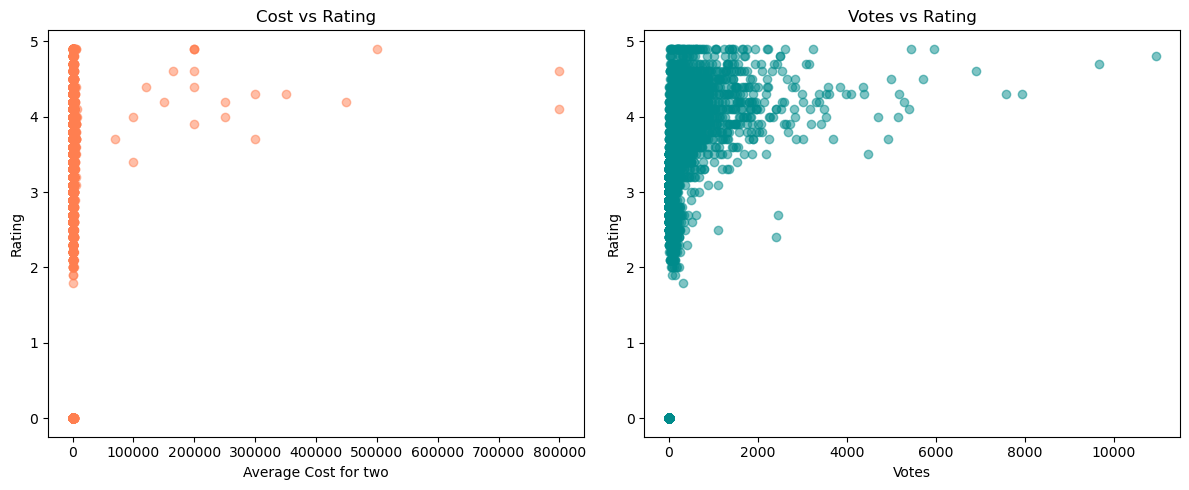

In [6]:
features=['Average Cost for two','Votes']
fig,axes=plt.subplots(1,2,figsize=(12,5))
axes[0].scatter(df[features[0]],df['Aggregate rating'],alpha=0.5,color='coral')
axes[0].set_title('Cost vs Rating');axes[0].set_xlabel(features[0]);axes[0].set_ylabel('Rating')
axes[1].scatter(df[features[1]],df['Aggregate rating'],alpha=0.5,color='darkcyan')
axes[1].set_title('Votes vs Rating');axes[1].set_xlabel(features[1]);axes[1].set_ylabel('Rating')
plt.tight_layout();plt.show()

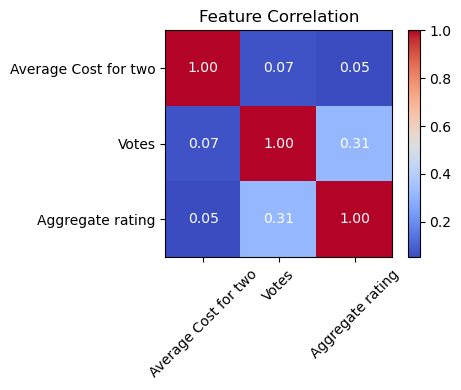

In [7]:
corr=df[['Average Cost for two','Votes','Aggregate rating']].corr()
plt.figure(figsize=(5,4))
plt.imshow(corr,interpolation='nearest',cmap='coolwarm')
plt.xticks(range(len(corr)),corr.columns,rotation=45)
plt.yticks(range(len(corr)),corr.index)
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j,i,f"{corr.iloc[i,j]:.2f}",ha='center',va='center',color='white')
plt.title('Feature Correlation');plt.colorbar();plt.tight_layout();plt.show()

In [8]:
print('Done viz on',len(df),'rows')

Done viz on 9551 rows
